# Data Visualization
## 패키지 import 및 matplotlib 한글 설정

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

## Sample Data

In [2]:
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

In [8]:
# 누락된 데이터를 이전 데이터로 채움
df = df.fillna(method='ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop('전출지별', axis=1, inplace=True)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

/tmp/ipykernel_46712/305764484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지별', axis=1, inplace=True)
/tmp/ipykernel_46712/305764484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)


In [9]:
#'경기도'에서 서울로 전입한 데이터를 선택하여 Series로 할당
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

## 선 그래프


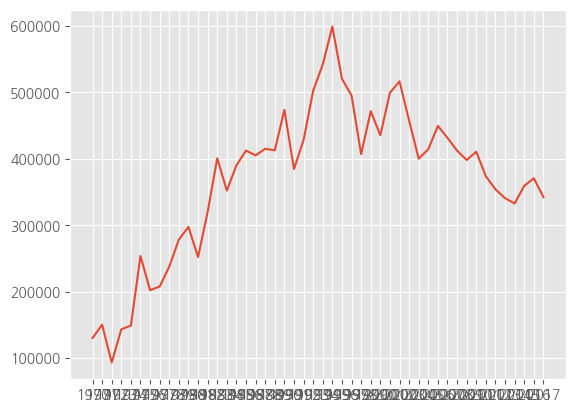

In [36]:
plt.plot(sr_one)

### 차트 제목, 축 이름 추가

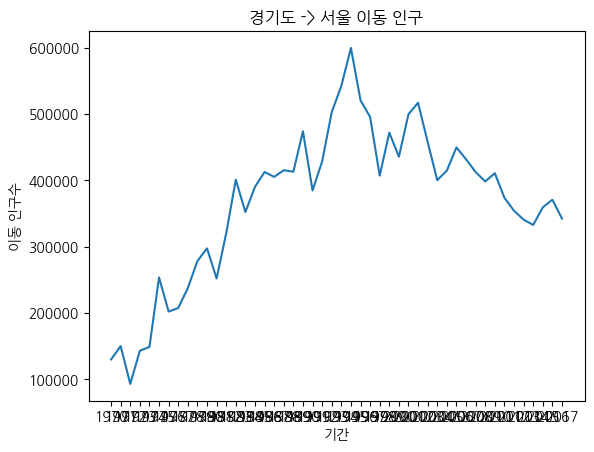

In [11]:
plt.plot(sr_one.index, sr_one.values)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 그래프 설정

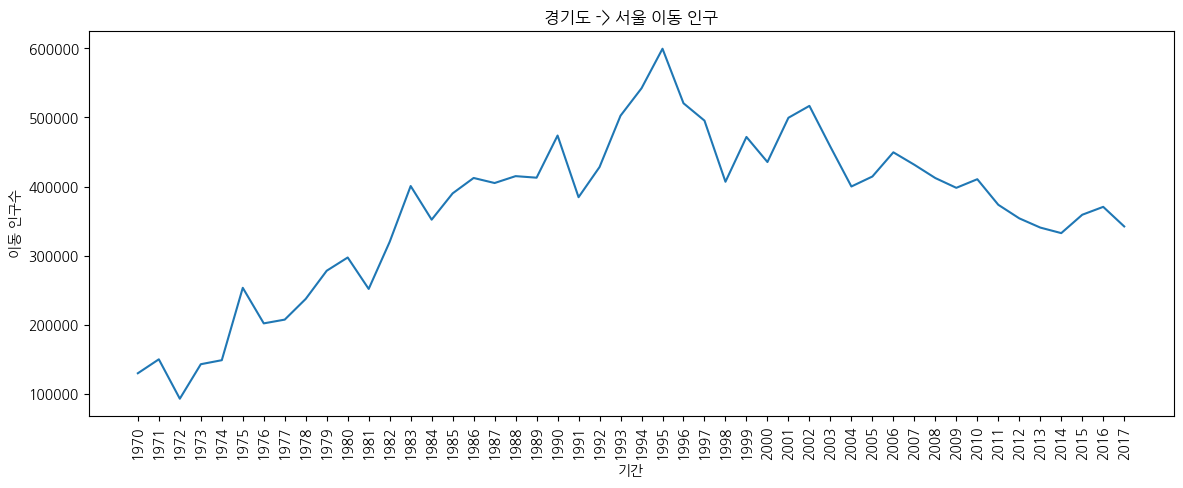

In [14]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 스타일 설정

In [26]:
plt.style.use('ggplot')

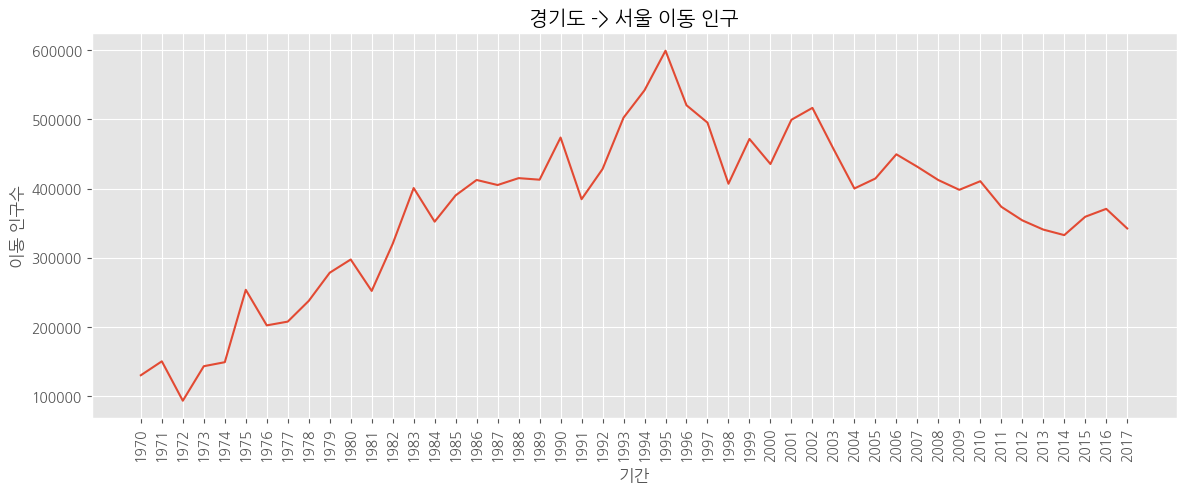

In [27]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 화면 분할, 여러개 그래프 작성

/tmp/ipykernel_46712/637083848.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
/tmp/ipykernel_46712/637083848.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


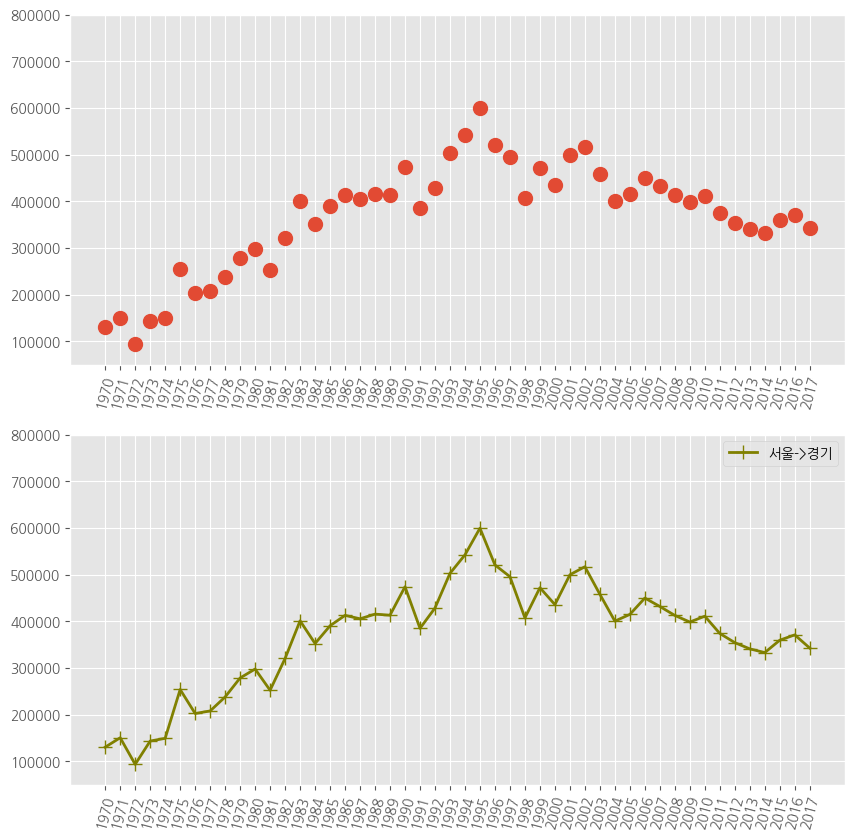

In [32]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
# add_subplot(row 크기, column 크기, 서브 플롯 순서)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, marker='o', markersize=10, linewidth=0)
ax2.plot(sr_one, marker='+', markerfacecolor='green',markersize=10, color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

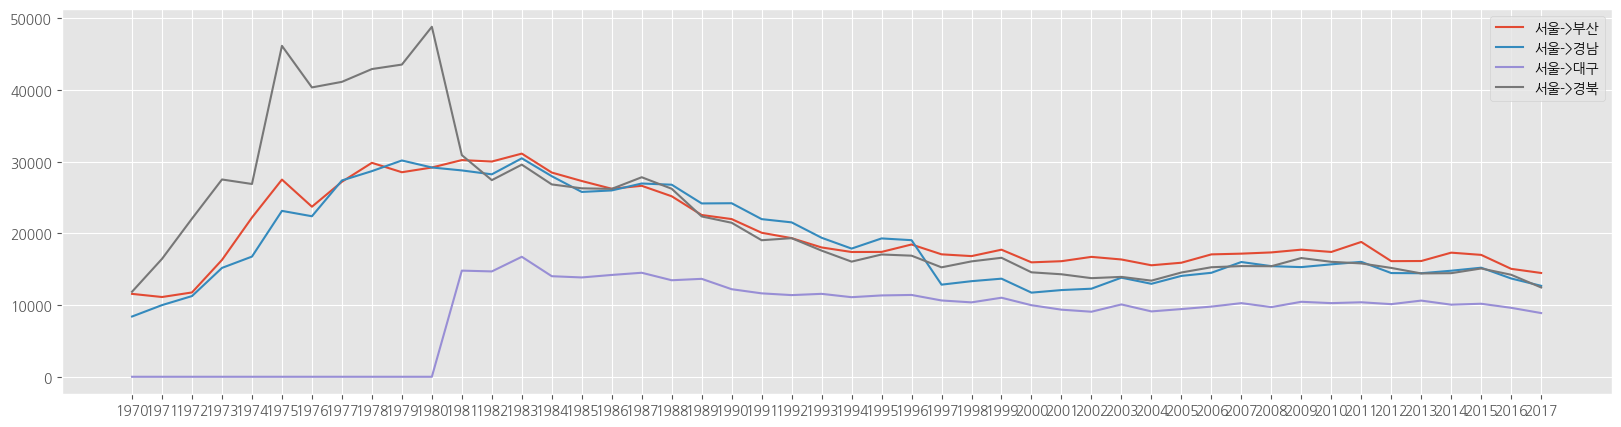

In [59]:
col_years = list(map(str, range(1970, 2018)))
df_2 = df_seoul.loc[['부산광역시','경상남도','대구광역시','경상북도'], col_years]

years = list(map(str, range(1970, 1981)))
df_2.loc['대구광역시', years] = 0

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_2.loc['부산광역시'], label='서울->부산')
ax.plot(df_2.loc['경상남도'], label='서울->경남')
ax.plot(df_2.loc['대구광역시'], label='서울->대구')
ax.plot(df_2.loc['경상북도'], label='서울->경북')

ax.legend(loc='best')

plt.show()